In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_context('notebook', font_scale=1.5)

# Data Science Stack

The following exercises give practice in the use of the Python data science stack, especially `pandas` for data manipulation and `seaborn` for quick statistical plotting.

**1**. (40 points) Read in the CSV file `pokemon.csv` in the local directory (Source: Kaggle). Do the following:

- Calculate the number of rows and columns in the data frame (5 points)
- Drop the column `Type 2` without creating a copy of the data frame i.e. in-place (5 points)
- Show a table with 5 rows sampled at random without replacement (5 points)
- Sort the data frame in descending order of `Speed` in-place (5 points)
- Create a column 'Value' where `value = 3*HP + 2*Attack + 1*Defense` (5 points)
- Drop all rows that have the string `Forme` in the `Name` column in-place (5 points)
- Find the mean and variance of `Attack` and `Defense` attributes of all the Type 1 AND Generation subgroups. For instance, one such group would be (Grass, 1). (10 points)

Note: If you change the data frame, print out the first 3 rows after each change with the `head` method.

In [4]:
#read in as a pandas data frame
pokemon=pd.read_csv('pokemon.csv')

#find the number of rows and number of colums
num_rows=pokemon.shape[0]
num_cols=pokemon.shape[1]
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 800
Number of columns: 13


In [5]:
#drop Column "Type 2" in place
pokemon.drop('Type 2',1, inplace=True)
print("\n \n Drop Column 'Type 2'")
pokemon.head(n=3)


 
 Drop Column 'Type 2'


,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False


In [6]:
#Take with 5 rows sampled without replacement 
print("\n \n Sample 5 without replacment")
pokemon.sample(n=5,replace=False, axis=0)


 
 Sample 5 without replacment


,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
289,266,Silcoon,Bug,205,50,35,55,25,25,15,3,False
257,238,Smoochum,Ice,305,45,30,15,85,65,65,2,False
732,664,Scatterbug,Bug,200,38,35,40,27,25,35,6,False
315,291,Ninjask,Bug,456,61,90,45,50,50,160,3,False
577,518,Musharna,Psychic,487,116,55,85,107,95,29,5,False


In [7]:
#sort data frame in decending order of Speed
print("\n \n Sort in Descending order of Speed")
pokemon.sort_values('Speed',ascending=False, inplace=True)
pokemon.head(n=3)


 
 Sort in Descending order of Speed


,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,600,50,95,90,95,90,180,3,True
315,291,Ninjask,Bug,456,61,90,45,50,50,160,3,False
428,386,DeoxysNormal Forme,Psychic,600,50,150,50,150,50,150,3,True


In [8]:
#Create a column 'Value' where value = 3*HP + 2*Attack + 1*Defense 
pokemon["Value"]=3*pokemon.HP+2*pokemon.Attack+pokemon.Defense
print("\n \n Data Frame with new column added")
pokemon.head(n=3)


 
 Data Frame with new column added


,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Value
431,386,DeoxysSpeed Forme,Psychic,600,50,95,90,95,90,180,3,True,430
315,291,Ninjask,Bug,456,61,90,45,50,50,160,3,False,408
428,386,DeoxysNormal Forme,Psychic,600,50,150,50,150,50,150,3,True,500


In [9]:
#Drop all rows that have the string Forme in the Name column in-place 
pokemon=pokemon[~pokemon.Name.str.contains("Forme")]
print("\n \n Drop Rows that contain 'Forme'")
pokemon.head(n=3)


 
 Drop Rows that contain 'Forme'


,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Value
315,291,Ninjask,Bug,456,61,90,45,50,50,160,3,False,408
154,142,AerodactylMega Aerodactyl,Rock,615,80,135,85,70,95,150,1,False,595
71,65,AlakazamMega Alakazam,Psychic,590,55,50,65,175,95,150,1,False,330


In [10]:
#Find the mean of Attack and Defense attributes of all the Type 1 AND Generation subgroups
print("\n \n Mean")
pokemon.groupby(["Type 1","Generation"]).mean()[["Attack","Defense"]]

mapped= {'Attack': ('mean', 'var'), 'Defense': ('mean', 'var')}
#I'll just display the first 10 lines because the output is so long 
pokemon.groupby(["Type 1","Generation"]).agg(mapped).head(n=10)




 
 Mean


Attack                 Defense             
                         mean          var       mean          var
Type 1 Generation                                                 
Bug    1            76.428571  2070.879121  60.357143   667.170330
       2            85.416667  2879.356061  93.750000  3227.840909
       3            55.833333   429.969697  54.083333   240.265152
       4            62.600000   655.377778  70.200000   707.288889
       5            77.611111   756.369281  78.277778   585.506536
       6            36.333333   226.333333  50.000000   100.000000
Dark   2            80.833333   214.166667  62.833333   940.166667
       3            97.500000  1267.500000  70.833333   894.166667
       4           111.666667   358.333333  69.000000   373.000000
       5            81.384615   474.089744  71.692308   618.897436

**2**. (30 points) Using the same Pokemon data frame, do the following:
    
- Create a new data frame with the following columns `Name`, `Type 1`, `Generation`, `Feature`, `Score` where `Name`, `Type 1`, `Generation` have the same meaning as in the original data frame, `Feature` is a column containing one of the following strings `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed` and `Score` is the numerical value of the feature. This is known as going from wide-to-tall formats. In R, this operation can be done using the `gatehr` function from the `tidyr` package. (10 points)
- Using the new data frame and the `seaborn` package, create a grid of box plots where the x-axis the Features, the y-axis shows the 'Score', the rows are the Type 1 values, and the columns are the Generation values.  (10 points)
- Using `seaborn`, make a `cluster map` showing the mean values of `HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def` and 	`Speed`   for each `Type 1` Pokemon. Rotate the Type 1 lables so they are readable. (10 points)

In [11]:
#create new dataframe
pokemon_2=pd.melt(pokemon,id_vars = ["Name", "Type 1", "Generation"],value_vars=["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def"])
#rename last column to score
pokemon_2.rename(columns={"value":"Score","variable":"Feature"},inplace=True)

print("\n \n Reshaped wide-to-tall Data Frame")
pokemon_2.head(n=10)





 
 Reshaped wide-to-tall Data Frame


,Name,Type 1,Generation,Feature,Score
0,Ninjask,Bug,3,HP,61
1,AerodactylMega Aerodactyl,Rock,1,HP,80
2,AlakazamMega Alakazam,Psychic,1,HP,55
3,BeedrillMega Beedrill,Bug,1,HP,65
4,SceptileMega Sceptile,Grass,3,HP,70
5,Accelgor,Bug,5,HP,80
6,MewtwoMega Mewtwo Y,Psychic,1,HP,106
7,Electrode,Electric,1,HP,60
8,LopunnyMega Lopunny,Normal,4,HP,65
9,ManectricMega Manectric,Electric,3,HP,70


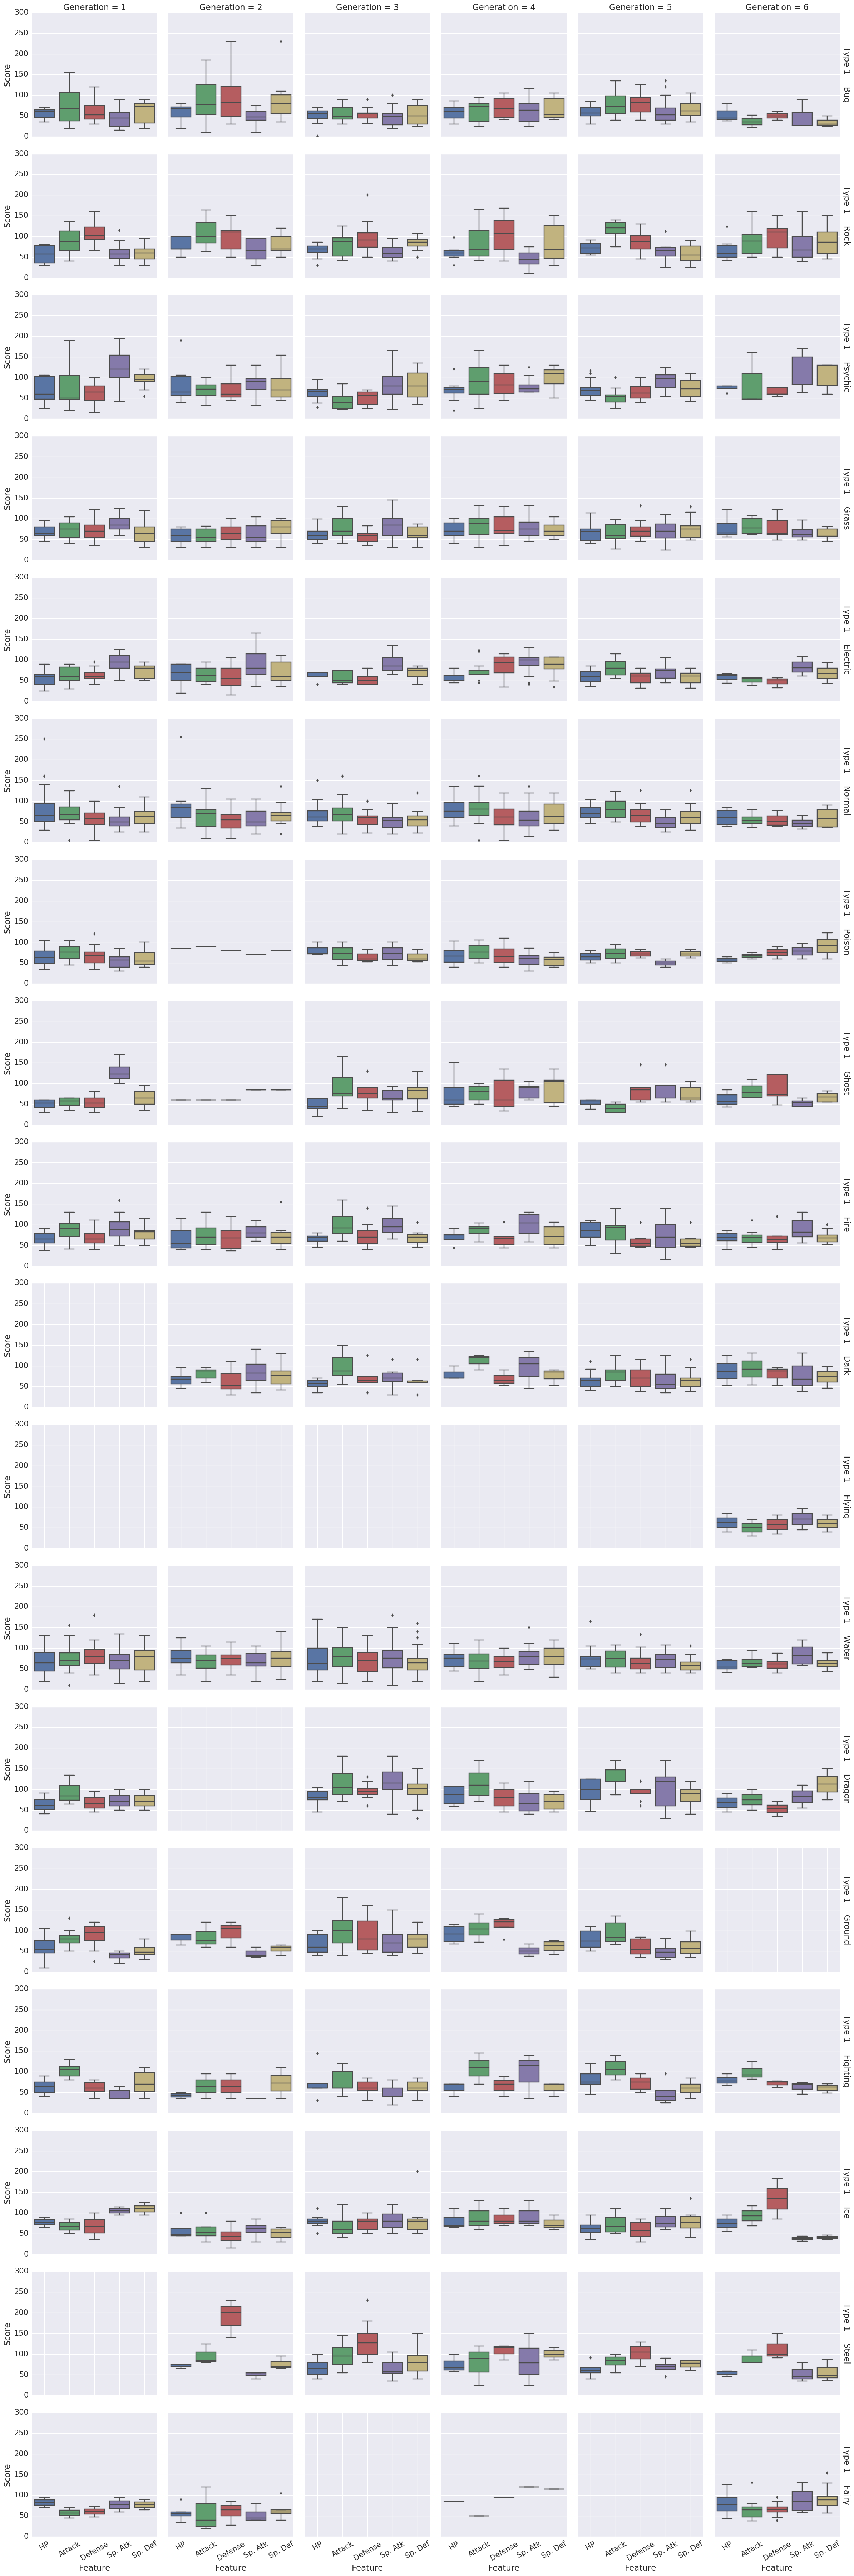

In [12]:
#box plots 
data=sns.factorplot(y='Score', x='Feature', col='Generation', row="Type 1",
               kind='box',
               data=pokemon_2, margin_titles=True)

data.set_xticklabels(rotation=30)

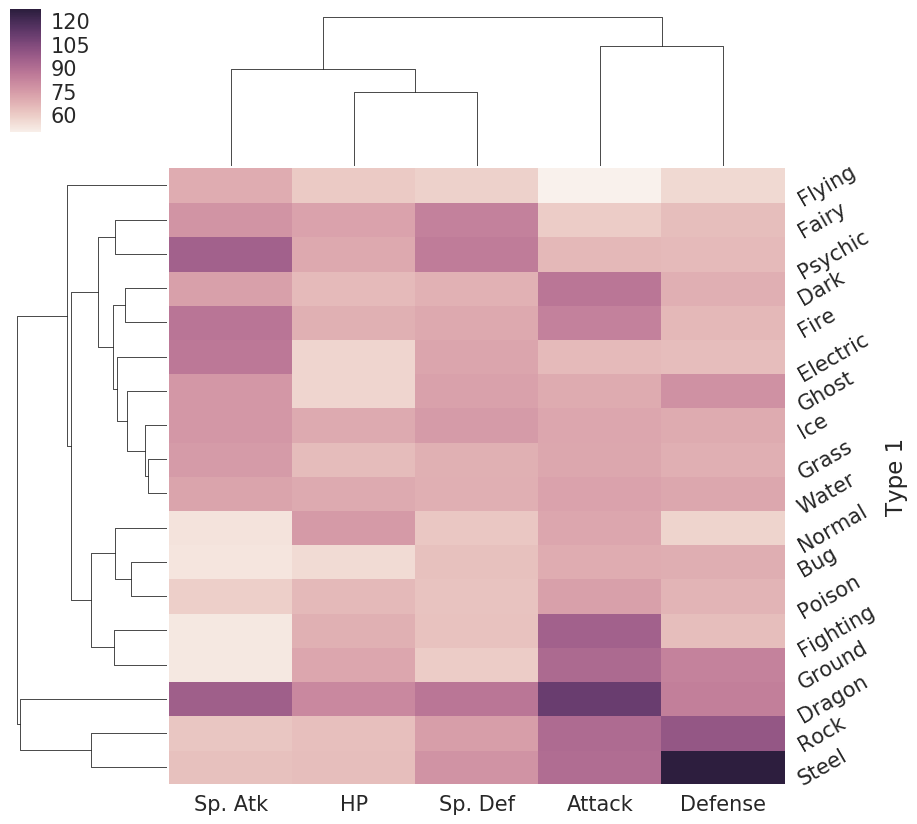

In [13]:
#make cluster maps
mapped={"HP":"mean", "Attack":"mean", "Defense":"mean", "Sp. Atk":"mean", "Sp. Def":"mean"}
group=pokemon.groupby('Type 1').agg(mapped)
cluster=sns.clustermap(group)
plt.setp(cluster.ax_heatmap.get_yticklabels(),rotation=30)
plt.show()


**3**. (30 points) Read in the CSV file `pokemonGo.csv` in the local directory (Source: Kaggle). Do the following:
    
- Create a new data frame with that combines columns from the `pokemon.csv` and `pokemonGO.csv` files. Drop any row that does not have `Name`, `Type 1` and	`Type 2` values that are exactly the same in both data frames. (10 points)
- Write a loop to download the images of Pokemon whose speed is greater than 120. (10 points)
- Display these Pokemon images in the Jupyter notebook. (10 points)

In [19]:
#read in pokemon go data
pokemon_go=pd.read_csv('pokemonGO.csv')
pokemon=pd.read_csv('pokemon.csv')

#merge the two into a new data frame 
combined_pokemon=pd.merge(left=pokemon, right=pokemon_go, on=["Name","Type 2","Type 1"],how="inner")
print(combined_pokemon.shape)
combined_pokemon.head(n=5)


(151, 17)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Pokemon No.,Max CP,Max HP,Image URL
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1,1079,83,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,2,1643,107,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,3,2598,138,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,4,962,73,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,5,1568,103,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


In [15]:
import urllib.request

#find number of rows
num_rows=combined_pokemon.shape[0]

#find the number with speed greater than 120
num_greater=sum(combined_pokemon["Speed"]>120)

#loop through to find the ones with speed greater than 120. Download.
j=1
for i in range(0,num_rows):
    
    #check if speed is greater than 120. If it is, download png as filenamej.png
    if combined_pokemon["Speed"][i]>120:
        filename="figure"+str(j)+".png"
        j=j+1
        urllib.request.urlretrieve(combined_pokemon["Image URL"][i], filename)


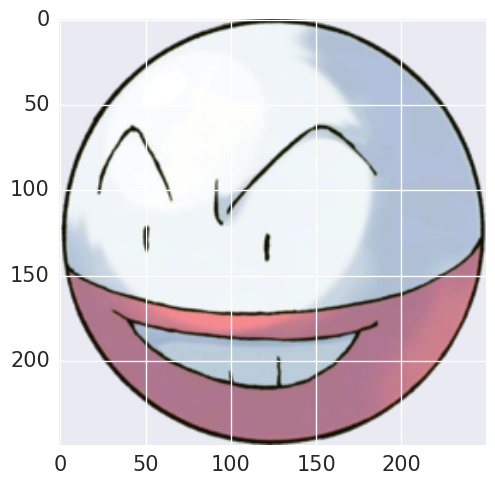

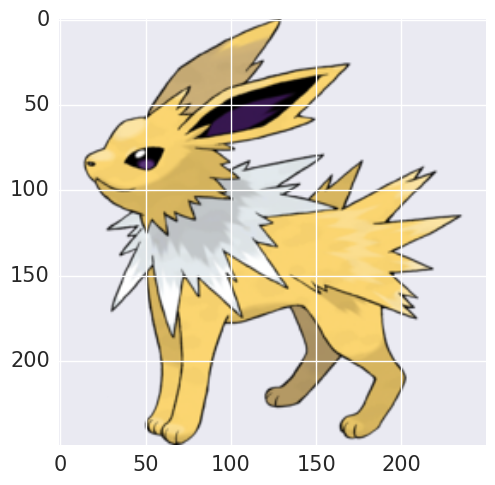

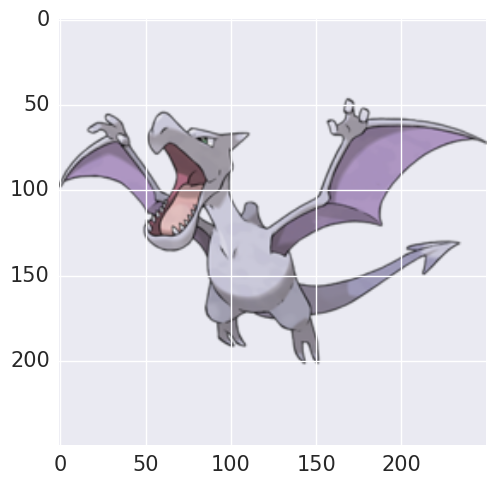

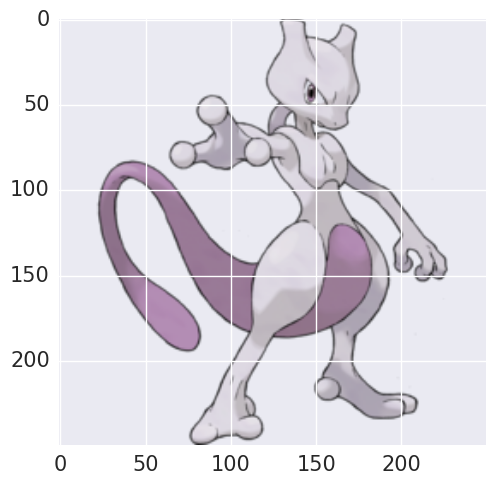

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Finally, display the downloaded images
for i in range(1,num_greater+1):
    filename='figure'+str(i)+".png"
    img = mpimg.imread(filename)
    plt.figure()
    plt.imshow(img)
    